## Feature Engineering

- 모델에 가장 적합한 Feature을 만들어 내는 것

## Generation

- Binarizaion, 카테고리별 라벨 인코딩
- one hot ecoding
- Scaling (Normalizaion)
- Log transformation

## Selection

- 그 중에서 잘 되어있는 Feature를 찾는 것

## Log transformations

- 데이터의 분포가 극단적으로 모였을 경우 (Poisson) (Long tail한 분포)
- Log를 씌어줘서 분포 모양을 고르게 만듦
- 선형 모델은 데이터가 정규분포인 경우에 적합
- Poisson -> Normal distribution
- 로그인 카운트, 제품 판매량, 검색 단어, 친구
- np.log or np.exp 등의 함수를 사용함

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.standard_normal(size=3)

X = rnd.poisson( 10 * np.exp(X_org))
y = np.dot(X_org, w)

Text(0.5, 0, 'Value')

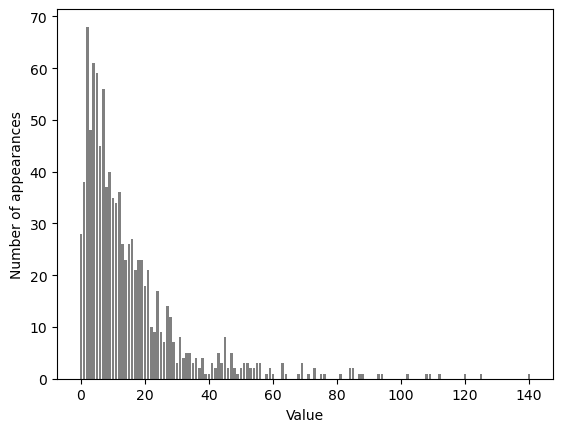

In [4]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

- 위의 그래프는 Long-tail한 형태의 분포
- Long tail 한 분포를 그대로 넣어준 경우 Test score의 결과가 0.622가 나왔음

In [5]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


#### After Log transformation

In [6]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

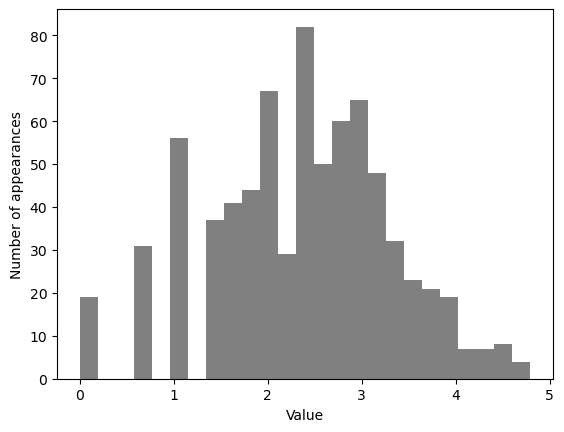

In [7]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [8]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


- log transformation 이후에 분포 모양이 고르게 나오고, Test score 도 올라갔음
- 모델의 성능이 올라갔다.